In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import astropy
print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.20.3
astropy: 4.3.1


In [88]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [86]:
from astropy.io import fits

To open the fits file we use `fits.open()` and just specify the filename as an argument:

In [5]:
fits_file = fits.open('../1_read_data/data_test/run_05029747_DL3.fits')

We can retrieve some basic information on the  header data unit (HDU) by calling `.info()`:

In [6]:
fits_file.info()

Filename: ../1_read_data/data_test/run_05029747_DL3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  EVENTS        1 BinTableHDU     59   6310R x 5C   [1K, 1D, 1E, 1E, 1E]   
  2  GTI           1 BinTableHDU     24   1R x 2C   [1D, 1D]   
  3  EFFECTIVE AREA    1 BinTableHDU     37   1R x 5C   [21E, 21E, 2E, 2E, 42E]   
  4  ENERGY DISPERSION    1 BinTableHDU     37   1R x 7C   [20E, 20E, 80E, 80E, 2E, 2E, 3200E]   


### Events

In [83]:
events.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   28 / width of table in bytes                        
NAXIS2  =                 6310 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / number of fields in each row                   
TTYPE1  = 'EVENT_ID'           / label for field   1                            
TFORM1  = '1K      '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'TIME    '           / label for field   2                            
TFORM2  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT2  = 's       '        

In [8]:
events = fits_file['EVENTS']

In [73]:
events_table = Table( events.data )
events_table

EVENT_ID,TIME,RA,DEC,ENERGY
int64,float64,float32,float32,float32
42,333778849.5267153,444.21463,23.44914,0.08397394
67,333778849.61315054,443.5247,22.725792,0.10596932
80,333778849.6690142,443.76956,22.451006,0.19733498
116,333778849.7778549,443.71518,21.985115,1.0020943
179,333778849.9826064,443.64136,22.041315,0.10316629
198,333778850.0339344,444.84238,22.175398,0.118843034
251,333778850.20117164,442.21805,21.617695,0.2293238
299,333778850.3477573,443.1049,22.165325,0.13139088
323,333778850.42124623,444.23206,22.624523,0.12255095


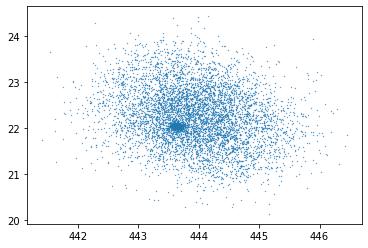

In [108]:
ra = events_table['RA']
dec = events_table['DEC']
plt.scatter(ra, dec, s=0.1)

In [109]:
position_crab = SkyCoord.from_name('Crab')

In [110]:
theta_cond = []
for i_ra,i_dec in zip(ra,dec):
    position_event = SkyCoord(  i_ra * u.deg, i_dec * u.deg, frame='icrs')

    theta_cond.append( position_crab.separation(position_event) < 0.6 * u.deg )

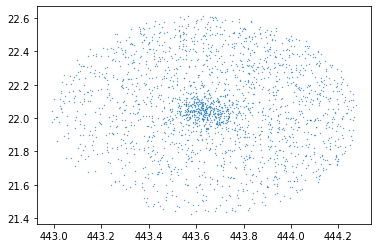

In [111]:
ra = events_table['RA'][theta_cond]
dec = events_table['DEC'][theta_cond]
plt.scatter(ra, dec, s=0.1)

### Effective Area

In [118]:
effective_area = fits_file['EFFECTIVE AREA']

In [119]:
effective_area.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  352 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / number of fields in each row                   
TTYPE1  = 'ENERG_LO'           / label for field   1                            
TFORM1  = '21E     '           / data format of field: 4-byte REAL              
TUNIT1  = 'TeV     '           / physical unit of field                         
TTYPE2  = 'ENERG_HI'           / label for field   2                            
TFORM2  = '21E     '        

In [120]:
effective_area = Table( effective_area.data)

In [121]:
theta_low  = np.array( effective_area['THETA_LO'] )[0]
theta_high = np.array( effective_area['THETA_HI'] )[0]
en_low     = np.array( effective_area['ENERG_LO'] )[0]
en_high    = np.array( effective_area['ENERG_HI'] )[0]
eff_area   = np.array( effective_area['EFFAREA'] )[0][0]

In [122]:
theta_high

array([0.6, 2. ], dtype=float32)

In [124]:
en_center = np.sqrt( en_low * en_high )

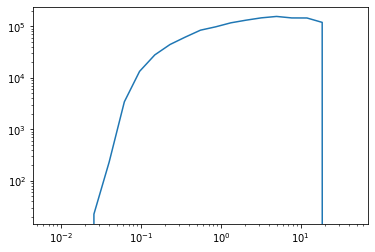

In [125]:
plt.plot(en_center,  eff_area)
plt.xscale('log')
plt.yscale('log')

In [126]:
# REMOVE BIN WITH EFF AREA = 0
cond = eff_area >0
en_center = en_center[cond]
en_low    = en_low[cond]
en_high   = en_high[cond]
eff_area  = eff_area[cond]

In [127]:
# theta2 cut
events_table_theta_cut = events_table[theta_cond]

In [130]:
excess = [] 
for i_en_low, i_en_high in zip( en_low, en_high):
    cond_low  = events_table_theta_cut['ENERGY'] >= i_en_low
    cond_high = events_table_theta_cut['ENERGY']  < i_en_high
    excess.append(  np.sum( cond_low* cond_high) )

In [131]:
excess

[0, 4, 505, 727, 383, 198, 153, 70, 46, 16, 12, 3, 4, 1, 0, 0]

In [132]:
eff_area

array([2.2460180e+01, 2.2943048e+02, 3.4086284e+03, 1.3287966e+04,
       2.7749039e+04, 4.4158090e+04, 6.1444973e+04, 8.3793242e+04,
       9.7357133e+04, 1.1650743e+05, 1.3111770e+05, 1.4543525e+05,
       1.5488862e+05, 1.4494316e+05, 1.4456914e+05, 1.1876939e+05],
      dtype=float32)

In [133]:
flux = excess/eff_area[0]
flux = np.nan_to_num( flux, 0)

cond = flux > 0
en_center = en_center[cond]
flux = flux[cond]

In [134]:
flux

array([ 0.17809296, 22.48423626, 32.36839557, 17.05240097,  8.81560154,
        6.81205574,  3.11662681,  2.04806905,  0.71237184,  0.53427888,
        0.13356972,  0.17809296,  0.04452324])

## FINAL FLUX

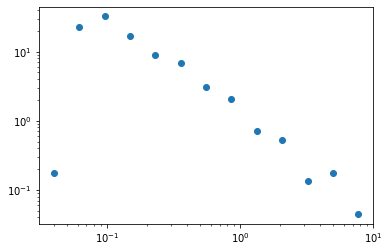

In [136]:
plt.scatter( en_center, flux) 
plt.xscale('log')
plt.yscale('log')

In [137]:
en_disp.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                13616 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    7 / number of fields in each row                   
TTYPE1  = 'ENERG_LO'           / label for field   1                            
TFORM1  = '20E     '           / data format of field: 4-byte REAL              
TUNIT1  = 'TeV     '           / physical unit of field                         
TTYPE2  = 'ENERG_HI'           / label for field   2                            
TFORM2  = '20E     '        

In [138]:
Table( en_disp.data )

ENERG_LO [20],ENERG_HI [20],MIGRA_LO [80],MIGRA_HI [80],THETA_LO [2],THETA_HI [2],"MATRIX [2,80,20]"
float32,float32,float32,float32,float32,float32,float32
0.025 .. 24.364733,0.035912562 .. 35.0,0.0 .. 2.9625,0.0375 .. 3.0,0.0 .. 0.6,0.6 .. 2.0,0.0 .. 0.0
